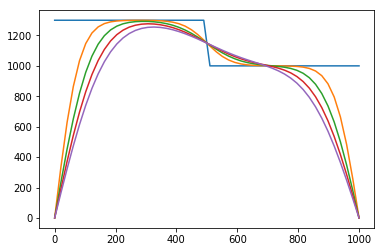

In [1]:
from matplotlib.pyplot import plot, show
from numpy import linspace, zeros, exp, nan_to_num
from scipy.linalg import solve

L = 1000 # space length
Nx = 50 # x step count
Nt = 50 # time step count 
k = 3 # Thermal conductivity, W/m/K
cp = 1000 # Heat capacity, J/kg/K
rho = 3000 # Density, kg/m^3
rhocp = rho*cp # volumetric heat capacity, J/m^3
kappa = k/rhocp # Thermal diffusivity, m^2/s

x = linspace(0, L, Nx)  # mesh points in space
dx = x[1] - x[0] # x step value
temp = linspace(0, L, Nx)  # unknown temp
dtexp = dx ** 2/3/kappa # Limitation for explicit timestep
dt = 1.53*dtexp          # Timestep, s

# Data structures for the linear system
A = zeros((Nx, Nx))
b = zeros(Nx)

# Set initial condition in kelvins
temp[:] = 1000 
temp[:int(len(temp) / 2)] = 1300 

#create matrix
for i in range(1, Nx - 1):
    A[i, i - 1] = -kappa/dx ** 2 
    A[i, i + 1] = -kappa/dx ** 2 
    A[i, i] = 1/dt+2*kappa/dx ** 2 

A[0, 0] = A[-1, -1] = 1

#solve
for n in range(0, Nt):
    if n % 10 == 0:
        plot(x, temp)
    # Compute b and solve linear system
    b[1:-1] = temp[1:-1]
    b[0] = b[-1] = 0
    temp[:] = solve(A, [b_i / dt for b_i in b])

show()
